# Setting the parameter $\theta$


## k-fold cross-validation
The parameter $\theta$ can be chosen by k-fold cross-validation. In brief, a random subset of the $n$ samples are taken from the entire dataset. $k$ experimental measurements are randomly selected and used for fitting. The remaining $m-k$ are used as a test set. The procedure is repeated `nfold` times for different values of theta. 
The function `theta_scan()` performs the calculation described above, and produces a plot showing the training error, test error and effective number of frames $\phi$ for each $\theta$. 


Performing 5-fold cross validation for 20 theta values
[============================================================] 100.0% ...

Optimal theta: 14.38
Validation error reduction 0.537
Training error reduction 0.290
Fraction of effective frames  0.735


14.38449888287663

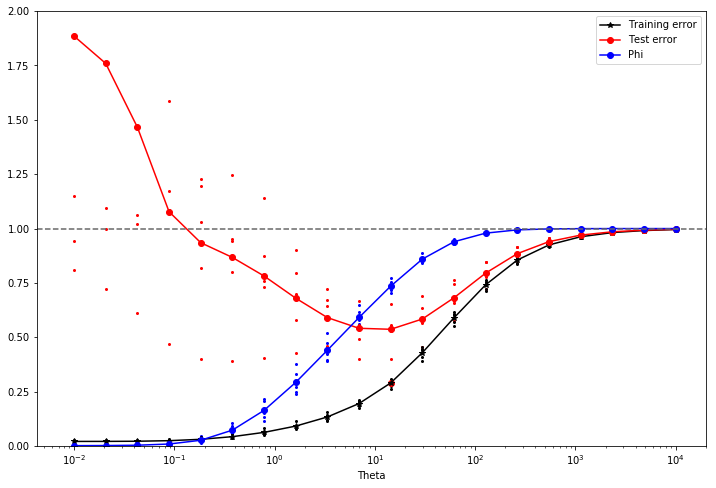

In [7]:
import sys,os
import numpy as np
bme_dir = os.getcwd().split("notebook")[0]
sys.path.append(bme_dir)
import BME as BME

# define input file names
exp_file_1 = "%s/data/couplings_exp.dat" % bme_dir
calc_file_1 = "%s/data/couplings_calc.dat" % bme_dir
exp_file_2 = "%s/data/NOE_exp.dat" % bme_dir
calc_file_2 = "%s/data/NOE_calc.dat.zip" % bme_dir


# initialize. A name must be specified 
rew = BME.Reweight("example_02")

# load the experimental and calculated datasets
# In this example both NOE and scalar couplings are loaded
rew.load(exp_file_1,calc_file_1)
rew.load(exp_file_2,calc_file_2)

thetas = np.geomspace(0.01,10000,20)
rew.theta_scan(thetas=thetas,nfold=5)



In the case above the lowest test error is achieved for $\theta \approx 14$. 
By default, for each fold 75% of the experimental data are randomly selected ( `train_fraction_data=0.75`), leaving the remaining 25% for test.  80% of the samples are used in a single fold (`train_fraction_samples=0.8`). 
These fractions (together with the number of folds ) can be adjusted in the following manner: 

Performing 10-fold cross validation for 20 theta values
[============================================================] 100.0% ...

Optimal theta: 6.95
Validation error reduction 0.540
Training error reduction 0.210
Fraction of effective frames  0.622


6.951927961775605

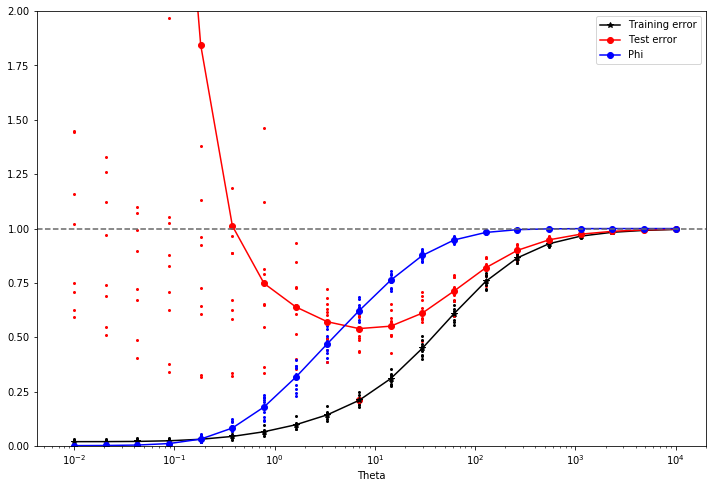

In [8]:
# initialize. A name must be specified 
rew = BME.Reweight("example_02")

# load the experimental and calculated datasets
# In this example both NOE and scalar couplings are loaded
rew.load(exp_file_1,calc_file_1)
rew.load(exp_file_2,calc_file_2)

thetas = np.geomspace(0.01,10000,20)
rew.theta_scan(thetas=thetas,train_fraction_data=0.7,train_fraction_samples=0.75,nfold=10)

Note that in this case the best $\theta$ is 6.95. This is not unexpected as there is no optimal value for this parameter, but rather a range of values that could fit the data without overfitting. The user is encouraged to experiment with the dataset and choose different training/validation/test datasets. It's a rather boring but very useful excercise. 